In [175]:
import pandas as pd

In [176]:
df = pd.read_csv('/Users/prayas/Desktop/ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


# Problem Statement
Ola is facing a big problem — many drivers stop working for the company, and finding new drivers is expensive. If Ola can predict which drivers are likely to leave, they can take early action to keep them.

In this project, we use the information about drivers — such as their city, age, ratings, income, time with the company, and work performance — to predict whether a driver is likely to continue working or leave.

The goal is to build a machine-learning model that helps Ola reduce driver loss, save hiring costs, and improve driver satisfaction.

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [178]:
print("Total Rows :", df.shape[0])
print("Total Columns :", df.shape[1])

Total Rows : 19104
Total Columns : 14


In [179]:
df.isna().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

There are some missing values present in the data in Age, Gender and Last Working Date.

In [180]:
#let's see how much percentage null value holds.

#Age
print("Total Percentage of NULL values in Age :", round((df['Age'].isna().sum() / df.shape[0]) * 100, 2), "%")

#Gender 
print("Total Percentage of NULL values in Gender :", round((df['Gender'].isna().sum() / df.shape[0]) * 100, 2), "%")

#Last Working Date
print("Total Percentage of NULL values in Last Working Date :", round((df['LastWorkingDate'].isna().sum() / df.shape[0]) * 100, 2), "%")


Total Percentage of NULL values in Age : 0.32 %
Total Percentage of NULL values in Gender : 0.27 %
Total Percentage of NULL values in Last Working Date : 91.54 %


# Univariate Analysis

In [181]:
# For numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

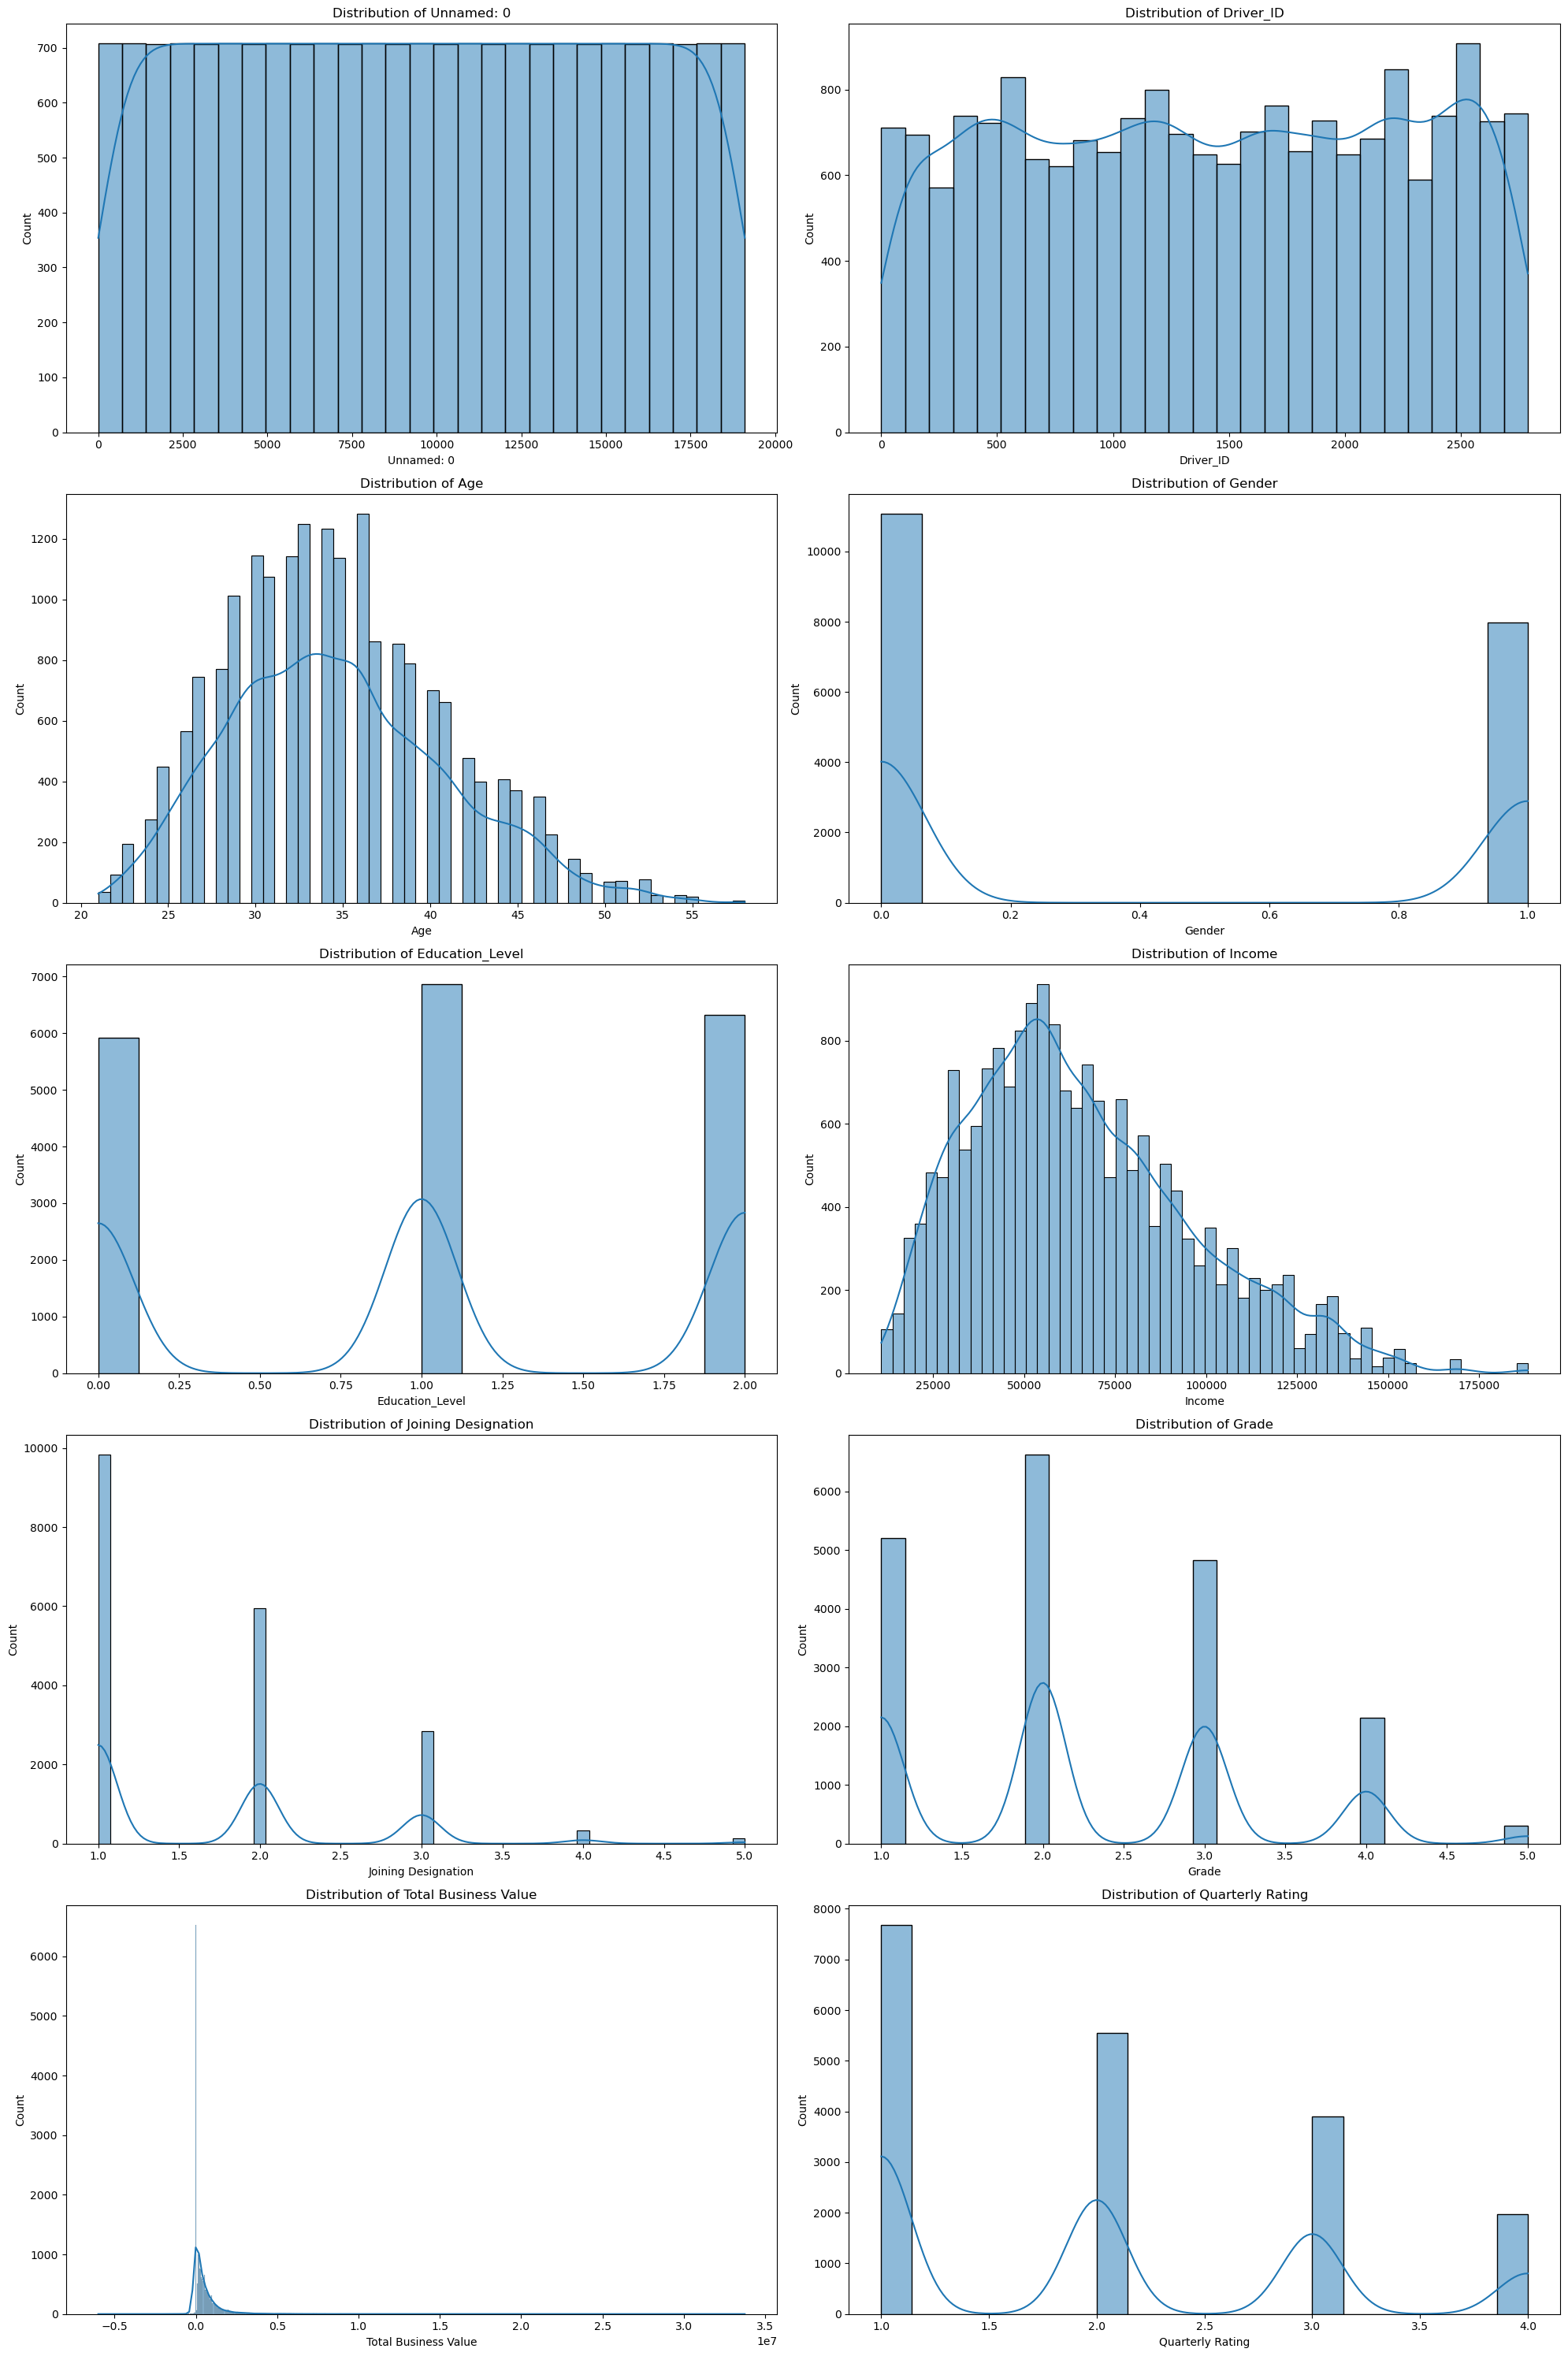

In [182]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
plt.figure(figsize = (20,30))

for i, col in enumerate(num_cols, 1):
    plt.subplot(5,2,i)
    sns.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()

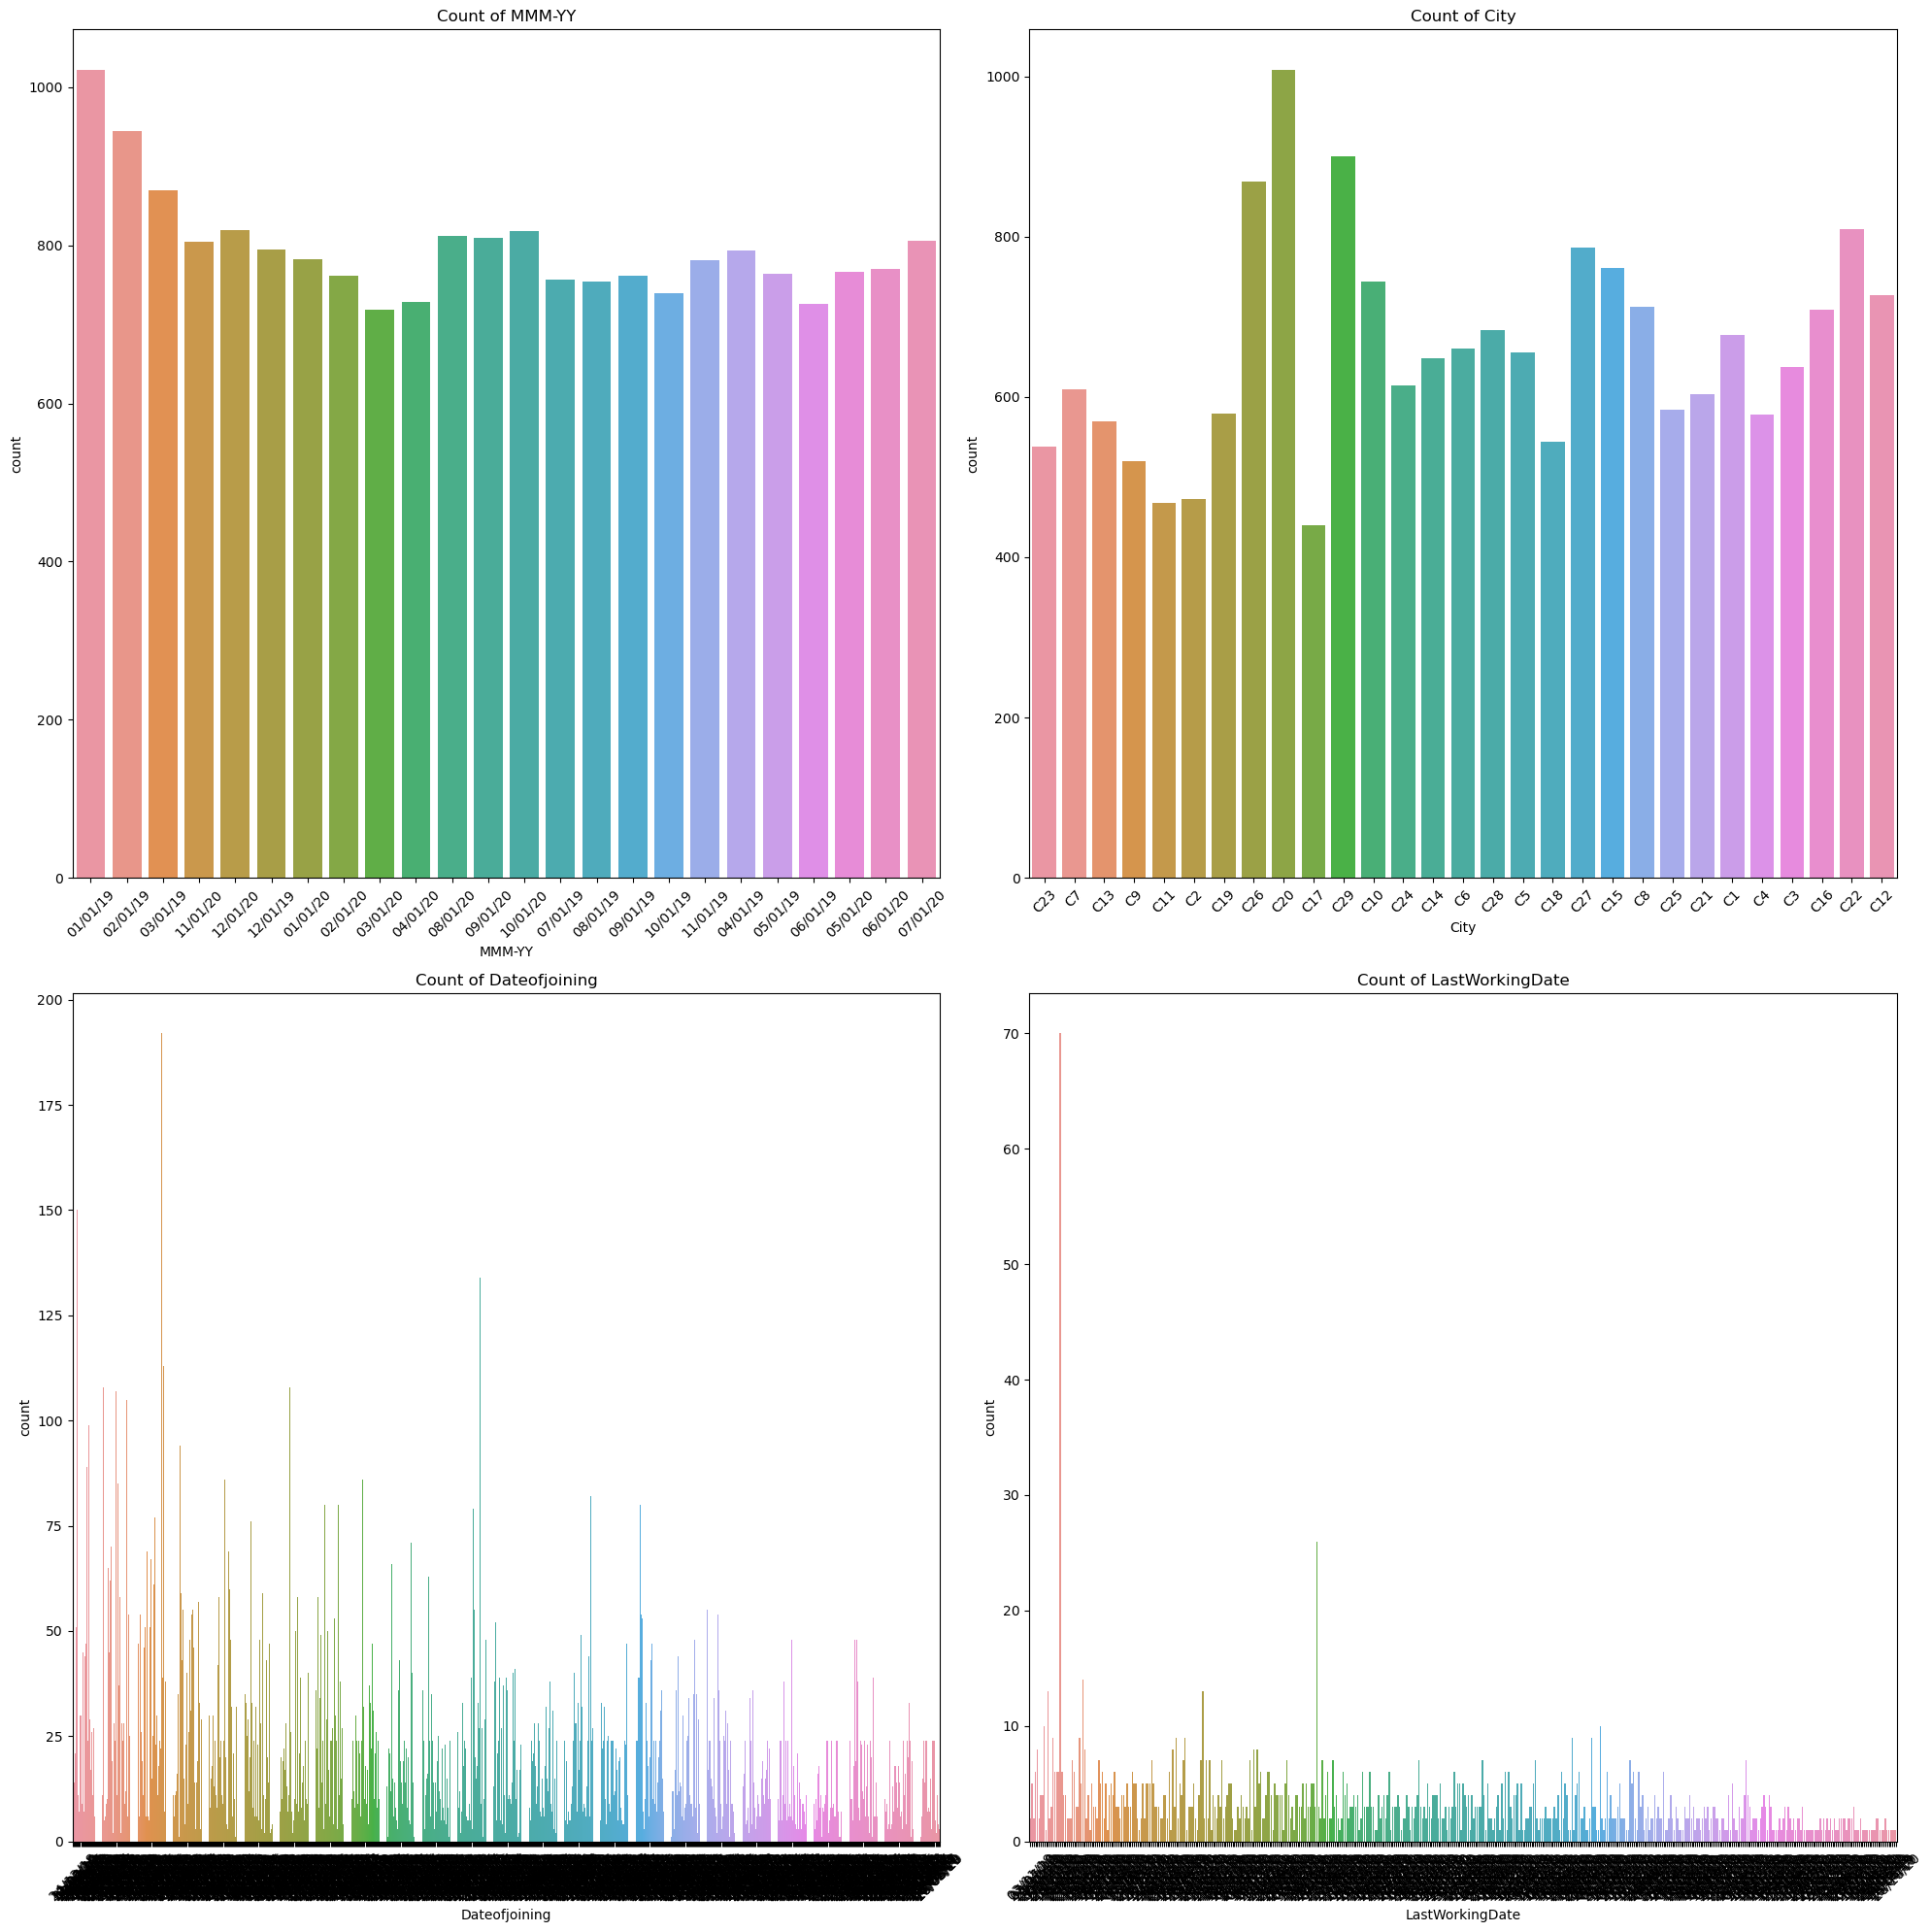

In [183]:
# Categorical Variable
cat_cols = df.select_dtypes(include = 'object').columns
plt.figure(figsize = (20,20))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    sns.countplot(x = df[col])
    plt.title(f"Count of {col}")
    plt.xticks(rotation = 45)
    
plt.tight_layout()
plt.show()

In [184]:
#dropping the unnamed column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [185]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [186]:
#creating new features
import pandas as pd

#converting date columns into Date formate
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format = '%m/%d/%y')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format = '%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format = '%d/%m/%y')

df = df.sort_values(["Driver_ID", "MMM-YY"])

# 1. Quarterly Rating Increase
df["Quarterly_Rating_Increase"] = df.groupby("Driver_ID")["Quarterly Rating"].diff().gt(0).astype(int)

# 2. Target Variable
df["Target"] = df["LastWorkingDate"].notna().astype(int)

# 3. Income Increase
df["Income_Increase"] = df.groupby("Driver_ID")["Income"].diff().gt(0).astype(int)

In [187]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Target,Income_Increase
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,0,1,0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,0,0,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,0,0,0


In [188]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating',
       'Quarterly_Rating_Increase', 'Target', 'Income_Increase'],
      dtype='object')

<Axes: xlabel='Target', ylabel='Age'>

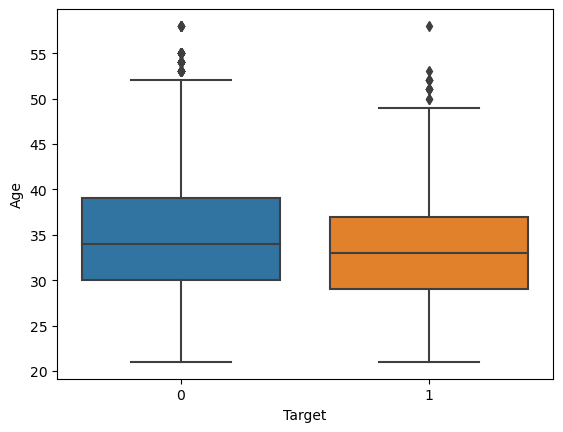

In [189]:
sns.boxplot(x='Target', y='Age', data=df)

The average age of people who churn is less than the average age of those who do not.

<Axes: xlabel='Target', ylabel='Income'>

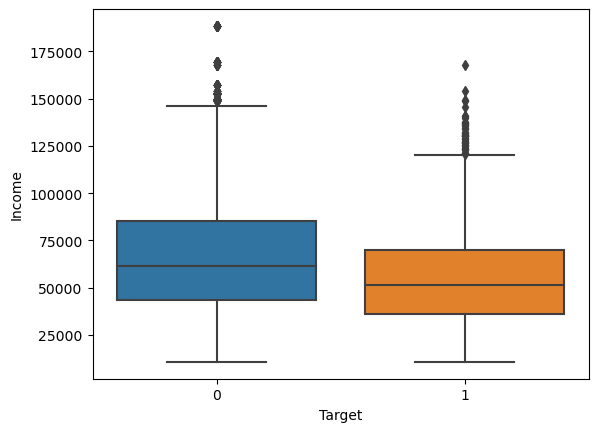

In [190]:
sns.boxplot(x='Target', y='Income', data=df)

The average income of people who churn is less than the average age of those who do not. And there are some outliers who have good income still churn.

<Axes: xlabel='Target', ylabel='Total Business Value'>

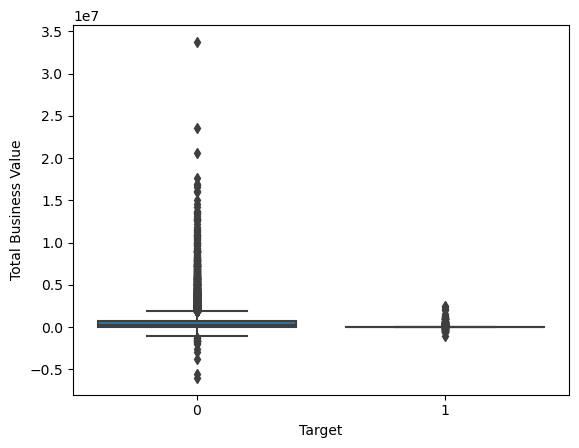

In [191]:
sns.boxplot(x='Target', y='Total Business Value', data=df)

The average Total Business Value is 0 of the people who churn.

<Axes: xlabel='Target', ylabel='Quarterly Rating'>

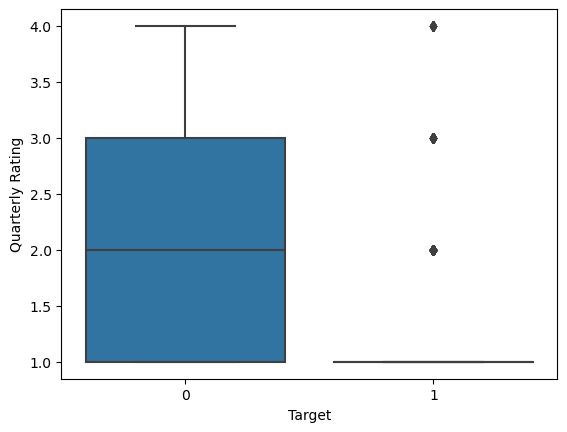

In [192]:
sns.boxplot(x='Target', y='Quarterly Rating', data=df)

The average rating of people is 0 but there are some outliers who have higher rating also churn

<Axes: xlabel='Quarterly_Rating_Increase', ylabel='count'>

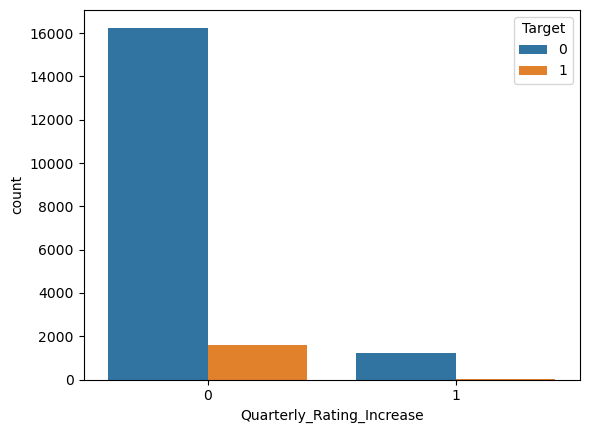

In [193]:
sns.countplot(x='Quarterly_Rating_Increase', hue='Target', data=df)

We can clearly see that if the rating is not increasing that person is most liky to churn.

<Axes: xlabel='Income_Increase', ylabel='count'>

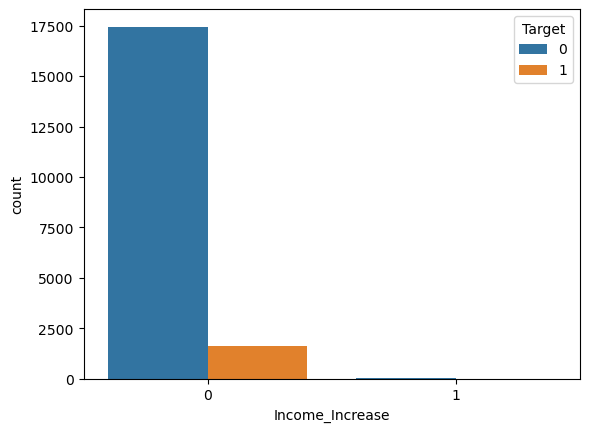

In [194]:
sns.countplot(x='Income_Increase', hue='Target', data=df)

Same with the income if it's not increasing there is churn in the data

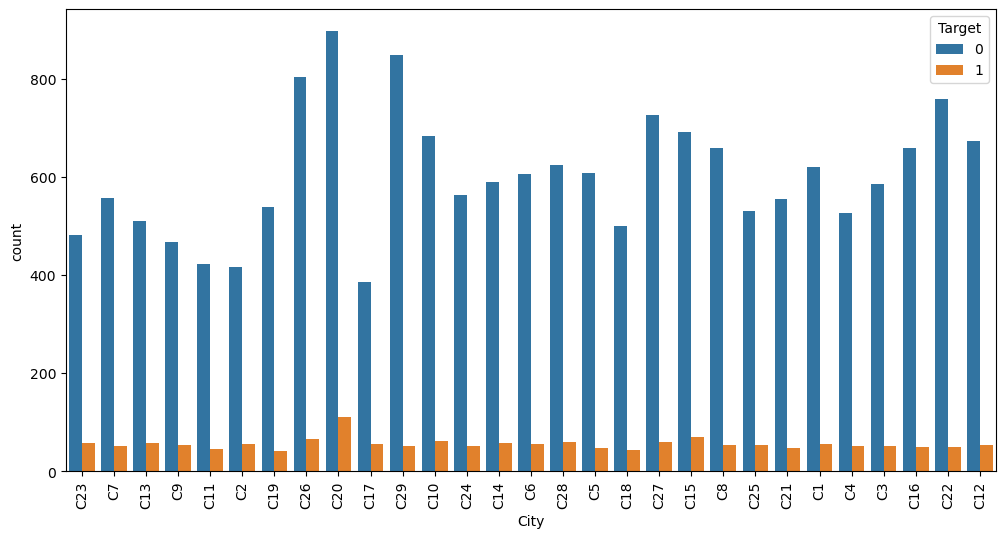

In [195]:
plt.figure(figsize=(12,6))
sns.countplot(x='City', hue='Target', data=df)
plt.xticks(rotation=90)
plt.show()

No clear insight in this graph

/var/folders/px/pgmdxsdx4pn1kz0hnhdbsg740000gn/T/ipykernel_74721/3083173704.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

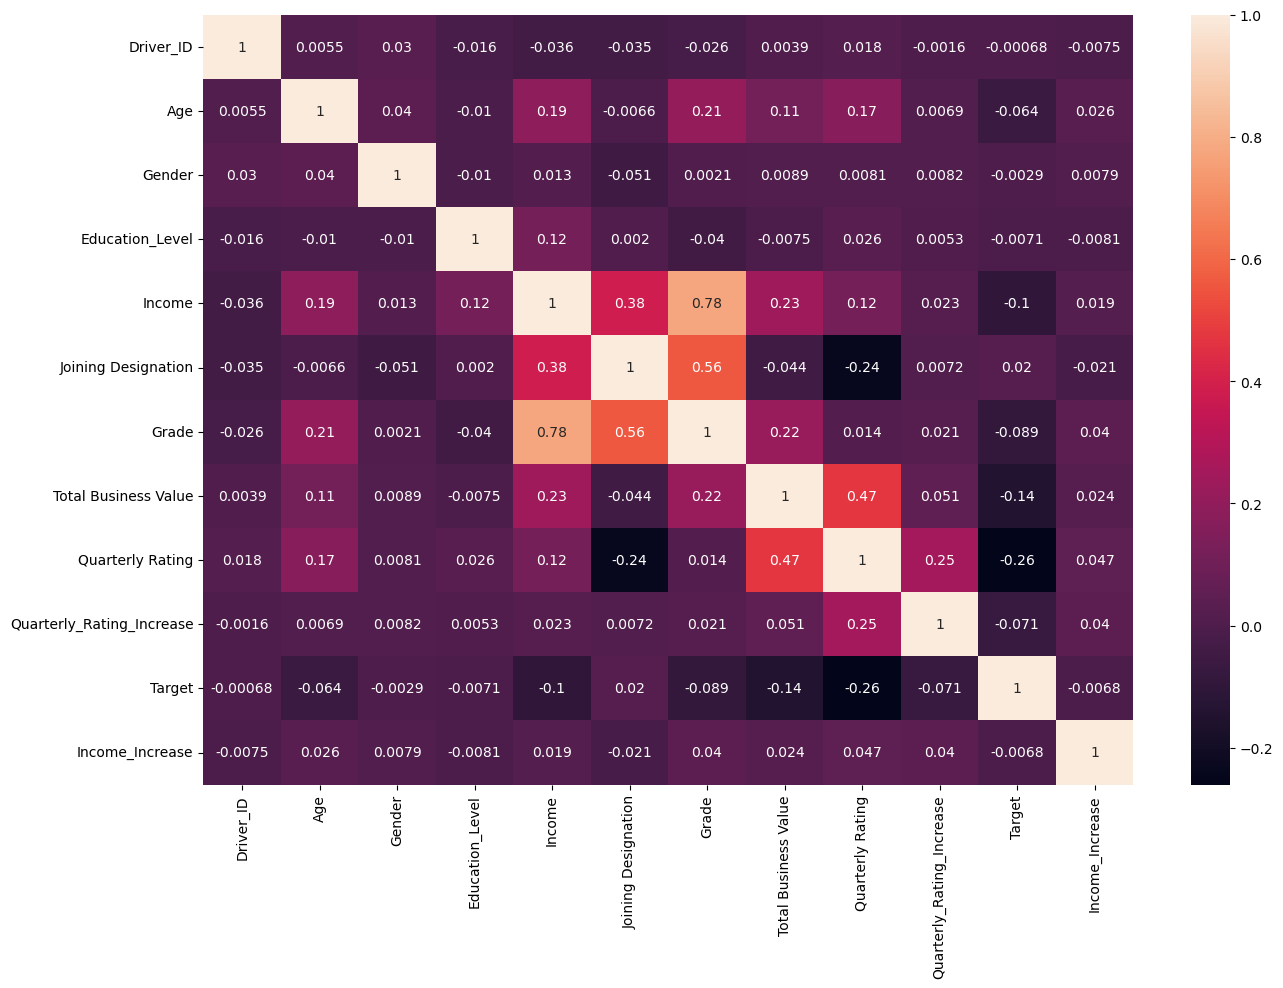

In [196]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

1. Grade is strongly correlated with Income, indicating that senior or top-performing drivers earn higher monthly income.
2. Joining Designation has a mild correlation with Grade, meaning the role drivers start with has some influence but does not fully determine their current grade.
3. Quarterly Rating shows a meaningful relationship with Total Business Value, indicating that better-rated drivers bring more business.

In [197]:
df['Target'].value_counts()

#data is imbalance

0    17488
1     1616
Name: Target, dtype: int64

In [198]:
#checking for the null values

df.isna().sum()

MMM-YY                           0
Driver_ID                        0
Age                             61
Gender                          52
City                             0
Education_Level                  0
Income                           0
Dateofjoining                    0
LastWorkingDate              17488
Joining Designation              0
Grade                            0
Total Business Value             0
Quarterly Rating                 0
Quarterly_Rating_Increase        0
Target                           0
Income_Increase                  0
dtype: int64

In [199]:
#Handeling missing values
#Age 
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
df[['Age']] = imputer.fit_transform(df[['Age']])

#Gender 
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

#LastWorkingDate
'''We are not going to impute LastWorkingDate because its missing values are meaningful
— they indicate that the driver is still active.
We used this feature to create the target variable (churn flag).
Imputing it would incorrectly label non-churned drivers and introduce data leakage.
Therefore, the column was excluded from imputation and model training.'''

'We are not going to impute LastWorkingDate because its missing values are meaningful\n— they indicate that the driver is still active.\nWe used this feature to create the target variable (churn flag).\nImputing it would incorrectly label non-churned drivers and introduce data leakage.\nTherefore, the column was excluded from imputation and model training.'

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MMM-YY                     19104 non-null  datetime64[ns]
 1   Driver_ID                  19104 non-null  int64         
 2   Age                        19104 non-null  float64       
 3   Gender                     19104 non-null  float64       
 4   City                       19104 non-null  object        
 5   Education_Level            19104 non-null  int64         
 6   Income                     19104 non-null  int64         
 7   Dateofjoining              19104 non-null  datetime64[ns]
 8   LastWorkingDate            1616 non-null   datetime64[ns]
 9   Joining Designation        19104 non-null  int64         
 10  Grade                      19104 non-null  int64         
 11  Total Business Value       19104 non-null  int64         
 12  Quar

# Feature Engineering

In [216]:
# Tenure days -- Difference of Reporting date and Joining Date

df['Tenure_Days'] = (df['MMM-YY'] - df['Dateofjoining']).dt.days

In [226]:
# Tenure Month
df['Tenure_Months']  = df['Tenure_Days'] // 30

In [227]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Target,Income_Increase,Tenure_Days,Tenure_Months
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0,0,8,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0,0,39,1
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,0,1,0,67,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,0,0,0,143,4
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,0,0,0,173,5


In [208]:
df[df['Tenure'] < 0][['MMM-YY', 'Dateofjoining', 'Tenure']]

,MMM-YY,Dateofjoining,Tenure
10,2019-01-01,2019-09-01,-243
11,2019-02-01,2019-09-01,-212
12,2019-03-01,2019-09-01,-184
18,2020-09-01,2020-09-19,-18
51,2020-10-01,2020-10-16,-15
...,...,...,...
19051,2019-05-01,2019-05-16,-15
19079,2020-08-01,2020-08-28,-27
19097,2020-06-01,2020-08-06,-66
19098,2020-07-01,2020-08-06,-36


In [215]:
#dropping the negative tenure values
df = df[df['Tenure'] >= 0]

In [230]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Target,Income_Increase,Tenure_Days,Tenure_Months
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,0,0,0,8,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,0,0,0,39,1
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-11-03,1,1,0,2,0,1,0,67,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,0,0,0,143,4
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-06-11,NaT,2,2,0,1,0,0,0,173,5


In [235]:
# Avg Quarterly Rating per Driver.
df['Average_Quarterly_Rating'] = df.groupby('Driver_ID')['Quarterly Rating'].transform('mean')
# will help identify low-consistent performers.
       
# Business Value Per Month
df['Business_Value_Per_Month'] = df['Total Business Value'] / (df['Tenure_Days'] / 30)
df.loc[df['Tenure_Days'] <= 0, 'Business_Value_Per_Month'] = 0
# Normalize Business Contribution

# Performance Decline Flag
df['Performance_Decline'] = df.groupby('Driver_ID')['Quarterly Rating'].diff().lt(0).astype('int')
# Rating's decline is often a leading indicator of churn.



# Income variance per driver 
df['Income_Variance'] = df.groupby('Driver_ID')['Income'].transform('var')
df['Income_Variance'].fillna(0)
# High variance means inconsistent pay -> higher churn probability.

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19096    0.0
19100    0.0
19101    0.0
19102    0.0
19103    0.0
Name: Income_Variance, Length: 17778, dtype: float64

In [246]:
df.sample(5)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Quarterly Rating,Quarterly_Rating_Increase,Target,Income_Increase,Tenure_Days,Tenure_Months,Average_Quarterly_Rating,Business_Value_Per_Month,Performance_Decline,Income_Variance
3300,2020-06-01,491,25.0,0.0,C2,2,41638,2020-01-05,NaT,1,...,1,0,0,0,148,4,1.000000,0.000000,0,0.0
14415,2019-02-01,2155,36.0,0.0,C29,2,42772,2018-10-30,NaT,1,...,1,0,0,0,94,3,1.428571,45434.042553,0,0.0
1291,2020-10-01,191,27.0,1.0,C11,2,63380,2019-12-19,NaT,3,...,3,0,0,0,287,9,2.750000,120212.195122,1,0.0
13029,2019-01-01,1936,24.0,0.0,C22,1,25818,2018-04-09,NaT,1,...,1,0,0,0,267,8,2.750000,0.000000,0,0.0
17456,2019-12-01,2561,42.0,1.0,C24,2,81854,2015-05-24,NaT,1,...,3,0,0,0,1652,55,3.250000,3525.000000,0,0.0


In [257]:
#dropping the features which will not be useful

df.drop(['MMM-YY', 'Driver_ID', 'Dateofjoining', 'LastWorkingDate'], axis = 1, inplace = True)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17778 entries, 0 to 19103
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        17778 non-null  float64
 1   Gender                     17778 non-null  float64
 2   City                       17778 non-null  object 
 3   Education_Level            17778 non-null  int64  
 4   Income                     17778 non-null  int64  
 5   Joining Designation        17778 non-null  int64  
 6   Grade                      17778 non-null  int64  
 7   Total Business Value       17778 non-null  int64  
 8   Quarterly Rating           17778 non-null  int64  
 9   Quarterly_Rating_Increase  17778 non-null  int64  
 10  Target                     17778 non-null  int64  
 11  Income_Increase            17778 non-null  int64  
 12  Tenure_Days                17778 non-null  int64  
 13  Tenure_Months              17778 non-null  int

In [262]:
#Encoding the City
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['City_Encoded'] = le.fit_transform(df['City'])

In [264]:
df.drop('City', axis = 1, inplace = True)
df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increase,Target,Income_Increase,Tenure_Days,Tenure_Months,Average_Quarterly_Rating,Business_Value_Per_Month,Performance_Decline,Income_Variance,City_Encoded
0,28.0,0.0,2,57387,1,1,2381060,2,0,0,0,8,0,2.0,8.928975e+06,0,0.0,15
1,28.0,0.0,2,57387,1,1,-665480,2,0,0,0,39,1,2.0,-5.119077e+05,0,0.0,15
2,28.0,0.0,2,57387,1,1,0,2,0,1,0,67,2,2.0,0.000000e+00,0,0.0,15
3,31.0,0.0,2,67016,2,2,0,1,0,0,0,143,4,1.0,0.000000e+00,0,0.0,26
4,31.0,0.0,2,67016,2,2,0,1,0,0,0,173,5,1.0,0.000000e+00,0,0.0,26


In [269]:
df['Income_Variance'] = df['Income_Variance'].fillna(0)

In [270]:
df.isna().sum()

Age                          0
Gender                       0
Education_Level              0
Income                       0
Joining Designation          0
Grade                        0
Total Business Value         0
Quarterly Rating             0
Quarterly_Rating_Increase    0
Target                       0
Income_Increase              0
Tenure_Days                  0
Tenure_Months                0
Average_Quarterly_Rating     0
Business_Value_Per_Month     0
Performance_Decline          0
Income_Variance              0
City_Encoded                 0
dtype: int64

In [271]:
#Checking for imbalance data
df.Target.value_counts()

0    16254
1     1524
Name: Target, dtype: int64

In [272]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop("Target", axis = 1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14222, 17)
(14222,)
(3556, 17)
(3556,)


In [273]:
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE: ", y_train.value_counts())
print("After SMOTE :", y_train_resampled.value_counts())

Before SMOTE:  0    13003
1     1219
Name: Target, dtype: int64
After SMOTE : 0    13003
1    13003
Name: Target, dtype: int64


In [276]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


# Model Building

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [283]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8976377952755905

Confusion Matrix:
 [[3076  175]
 [ 189  116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      3251
           1       0.40      0.38      0.39       305

    accuracy                           0.90      3556
   macro avg       0.67      0.66      0.67      3556
weighted avg       0.90      0.90      0.90      3556



/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [291]:
#let's tune this model 

from sklearn.model_selection import RandomizedSearchCV

param_grids = {
    "n_estimators" : [200,400,600,800],
    "max_depth" : [5,10,20, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True],
    "class_weight": ["balanced", "balanced_subsample"]
}


rf = RandomForestClassifier(random_state = 42)

rf_search = RandomizedSearchCV(rf,
                              param_distributions = param_grids,
                              n_iter = 20,
                              scoring = 'f1',
                              cv = 3,
                              verbose = 2,
                              n_jobs = -1)

rf_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [5, 10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800]},
                   scoring='f1', verbose=2)

In [293]:
best_model = rf_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8900449943757031
[[3030  221]
 [ 170  135]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3251
           1       0.38      0.44      0.41       305

    accuracy                           0.89      3556
   macro avg       0.66      0.69      0.67      3556
weighted avg       0.90      0.89      0.89      3556



/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[CV] END bootstrap=True, class_weight=balanced, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   8.6s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.4s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.5s
[CV] END bootstrap=True, class_weight=balanced, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=  17.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   6.9s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=  16.7s
[CV] END bootstrap=True, class_w

In [294]:
rf_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=200,
                       random_state=42)

In [296]:
rf = RandomForestClassifier(n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced', 
        random_state=42)

rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8883577052868391
[[3006  245]
 [ 152  153]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3251
           1       0.38      0.50      0.44       305

    accuracy                           0.89      3556
   macro avg       0.67      0.71      0.69      3556
weighted avg       0.90      0.89      0.89      3556



/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Classification Report Interpretation
    Model has significant increased,
             Recall has increased from 38% to 50% that means model now detects 50% of the driver who actually left, compared to 38% earlier.
             F1-Score for minority class has slightly improved from 39% to 44%

# Confusion Matrix Interpretation

    False negatives reduced (from ~170 → 152)
    True positives increased (from ~135 → 153)
    
        This means model is identifying more actual churners(this is our main goal)


In [297]:
# Let's try Xgboost
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:010m


In [298]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = XGBClassifier(n_estimators = 400,
                     learning_rate = 0.05,
                     max_depth=6,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train),  # handles imbalance automatically
                     eval_metric='logloss')


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9142294713160855
[[3251    0]
 [ 305    0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      3251
           1       0.00      0.00      0.00       305

    accuracy                           0.91      3556
   macro avg       0.46      0.50      0.48      3556
weighted avg       0.84      0.91      0.87      3556



/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prayas/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [307]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = XGBClassifier(n_estimators = 400,
                     learning_rate = 0.05,
                     max_depth=6,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective='binary:logistic',
                     scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train),  # handles imbalance automatically
                     eval_metric='logloss')


model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8323959505061868
[[2726  525]
 [  71  234]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3251
           1       0.31      0.77      0.44       305

    accuracy                           0.83      3556
   macro avg       0.64      0.80      0.67      3556
weighted avg       0.92      0.83      0.86      3556



In [308]:
params = {
    "n_estimators": 400,
    "learning_rate": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 3,
    "gamma": 0.2,
    "scale_pos_weight": df['Target'].value_counts()[0] / df['Target'].value_counts()[1]
}

model = XGBClassifier(**params)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8000562429696289

Confusion Matrix:
 [[2595  656]
 [  55  250]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      3251
           1       0.28      0.82      0.41       305

    accuracy                           0.80      3556
   macro avg       0.63      0.81      0.65      3556
weighted avg       0.92      0.80      0.84      3556



# Interpretation

    High recall for class 1 (82%) -- the model catches 82% of drivers who actually left.
    Good enough precision for class 1 (28%)
    Very high precision for class 0 (98%)
    Accuracy still acceptable (80%)
    
    - model is finally detecting churners effectively, which is the primary purpose.

In [310]:
# ROC AUC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

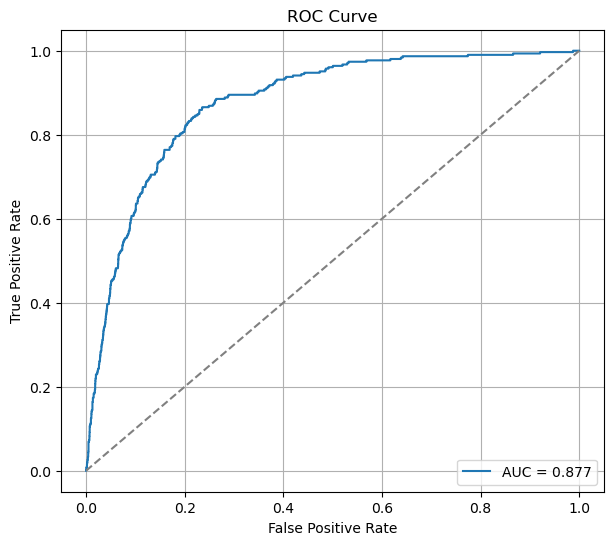

In [311]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# The model achieves an AUC of 0.877, meaning it correctly ranks churners above non-churners nearly 88% of the time, indicating strong discriminative power even under class imbalance.

In [313]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3251
           1       0.28      0.82      0.41       305

    accuracy                           0.80      3556
   macro avg       0.63      0.81      0.65      3556
weighted avg       0.92      0.80      0.84      3556



# Interpretation
       For Class 0 (Stayed):
            Precision 0.98 → When model says "stay," it's almost always correct.
            Recall 0.80 → It correctly identifies 80% of stayers.
       
       For Class 1 (Left):
            Precision 0.28 → Many false alarms. Only 28% predicted leavers actually left.
            Recall 0.82 → But the model catches most of the actual leavers.
            F1-score 0.41 → Balanced performance considering class imbalance.
            
Model is optimized for catching churners, not minimizing false alarms.

In [314]:
print(confusion_matrix(y_test, y_pred))

[[2595  656]
 [  55  250]]


# Interpretation
    True Postive (TP) - 250
            Meaning - Predicted “left” and actually left
            Model caught 250 employees who left
            
    False Positive (FP) - 656 
            Meaning - Predicted "left" but actually stayed 
            656 were wrongly marked as "leavers" by model
            
    True Negative (TN) - 2595
            Meaning - Predicted “stay” and actually stayed
            Model correctly identified 2595 stayers
    
    False Negative (FN) - 55
            Meaning - Predicted “stay” but actually left
            Only 55 leavers were missed (very low)
            
Model is very sensitive to the minority class (leavers).
It catches ~82% of people who left → High Recall for class 1.

In [316]:
# Now lets try to find the importance features

importance = model.get_booster().get_score(importance_type = 'gain') # gain - average improvement brought by a feature
importance_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance (Gain)': importance.values()
}).sort_values(by="Importance (Gain)", ascending=False)

importance_df

,Feature,Importance (Gain)
7,Quarterly Rating,693.333679
1,Gender,171.679047
6,Total Business Value,94.684303
13,Performance_Decline,87.171310
8,Quarterly_Rating_Increase,66.052933
12,Business_Value_Per_Month,56.355465
5,Grade,54.282848
2,Education_Level,41.233536
11,Average_Quarterly_Rating,38.186756
0,Age,35.875584


# Interpretation
1. Quarterly Rating - Drivers who consistently get lower ratings are more likely to leave → Performance issues → dissatisfaction → churn.
2. Gender - Gender differences truly correlate with churn behaviors.
3. Total Business Value matters - Drivers generating lower business value are at higher churn risk.
4. Performance Decline Flag is highly predictive - A decline in rating → strong signal of potential churn.
5. Quartely Rating Increase = retention signal - If a driver’s rating is going up, churn probability drops.
6. Tenure is important - Low tenure = new drivers leave faster.
7. Income and Income Variance matter but not as much - Stable income → less likely to churn. 
    Fluctuating income → churn risk.
8. City encodings matter - Location affects churn—competition, cost of living, incentives, etc.

# Top Predictors of Churn

1. Quarterly Performance Rating

2. Performance Decline Flag

3. Total Business Value Metrics

4. Gender & Demographics

5. Tenure

# Actionable Insights & Recommendations

1. Performance Rating Intervention Program

        * Flag drivers whose ratings fall for 2 months.
        * Provide performance feedback early.
        
2. Business Value Support

        * Provide business coaching for drivers with declining TBV.
        * Offer incentive programs to stabilize business value.
        
3. Early Tenure Retention Strategy
        
        * Most churn happens early → onboarding programs should be improved.
        
4. Income Stability Incentives
        
        * Reduce variance in income (predictability = lower churn).
       
5. City-specific interventions
    
        * Create targeted retention plans per city cluster.